<h1 style="color:#4C7AAF;">Investigating the Impact of Temperature on Ozone (O<sub>3</sub>) Formation  </h1>

GitHub Repo link: https://github.com/sharkgurl/MCSC_CSCA_5622/blob/master/MSCS_CSCA5622_AirQuality.ipynb

<h1 style="color:#4C7AAF;">Introduction</h1>

Air pollution, driven by urbanization and industrialization, **poses significant health and environmental risks** (Kekulanadara et al., 2021). Monitoring urban pollution can be expensive and difficult because traditional industrial spectrometer-based stations are large, costly, and impractical for creating a dense measurement network. The complex structure of urban areas requires more granular monitoring to capture pollution patterns accurately, which is often not feasible with existing station networks. Low-cost gas multisensor devices offer a potential solution by providing affordable, smaller alternatives to increase city monitoring density (De Vito et al., 2009). <br> <br>
The PT08.S5 (O<sub>3</sub>) feature in the UCI Air Quality dataset represents a sensor reading for ozone concentration from the low-cost gas multisensor device deployed on the field in an Italian city. This particular sensor measures the resistivity or response of the sensor that reacts to ozone levels in the air. While it doesn't directly provide the exact concentration of ozone, it offers a proxy measurement that can be correlated with ozone levels through machine learning models.

The **objective of this study** is to **investigate the impact of temperature on ozone (O<sub>3</sub>) formation**, with a particular focus on understanding **whether there is a delayed effect of temperature on ozone levels**. By incorporating **lagged variables** of ozone concentration, the study aims to determine if higher temperatures at earlier points in time contribute to increased ozone formation in subsequent periods.
The study uses **Linear Regression** and **Random Forest** models and compares their outcomes.

<h1 style="color:#4C7AAF;">Project Libraries</h1>

The project utilizes the Pandas, NumPy, Math, Scipy, and Statsmodels libraries for data manipulation and Seaborn and Matplotlib for visualization. 
Scikit-learn provides all the other libraries used for the Linear Regression and Random Forest machine learning algorithms, performance metrics (MAE, MSE, R-squared), validations, etc., for evaluating air pollution predictions.

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import math
from math import exp
from scipy import stats
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.ensemble  import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

<h1 style="color:#4C7AAF;">Data Understanding</h1>

### Data Source

**Citation:** Vito, S. (2008). Air Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C59K5F.

* This dataset contains the response of a gas multisensor device deployed on the field in an Italian city. 
* Hourly response averages are recorded along with gas concentration references from a certified analyzer. 
* The date range for this dataset is from March 2004 to April 2005. Dates are in the format '%d/%m/%Y'.
* A single tabular dataset is used in this project.
* The dataset "AirQualityUCI.csv" was downloaded from the UCI site (https://archive.ics.uci.edu/dataset/360/air+quality) as a CSV file (approx. 1.5MB) and loaded into the dataframe df.
* A separator and decimal parameters were defined to properly handle the loading of the 'AirQualityUCI.csv' file.

In [13]:
file_path = '/Users/cintiacampos/CUBoulder_NB/Machine_Learning/week7Project/air+quality/AirQualityUCI.csv'

In [14]:
df = pd.read_csv(file_path, sep=';', decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


**Observation**: the last 2 columns in the dataset seem to be null and candidates for removal.

### Data Shape

In [17]:
print(f"The 'AirQualityUCI' dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")

The 'AirQualityUCI' dataset consists of 9471 rows and 17 columns.


### Data Info

Below, the function df.info() gives a concise summary of the df created above from the file 'AirQualityUCI.csv'. <br>
This summary includes the number of features in the dataset (#) and their respective names (Column), the number of non-null entries in each column (Non-Null Count), their type (Dtype), and the memory usage of the DataFrame.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


**Observation:** This summary also confirms that the columns 15 and 16 contain 0 non-null values and therefore can be dropped.

### Data Description

By using the function df.describe(), a statistical summary of the DataFrame's numerical columns is provided. <br>
This includes count, mean, standard deviation (std), minimum (min) and maximum (max) values, and the 25%, 50%, and 75% percentiles.

In [24]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


**Observation:** There seems to be an issue with values -200 which will need to be investigated.

### Understanding The Dataset Features

The AirQualityUCI dataset provides Ground Truth, Sensor reading, Meteorological and Temporal variables critical for monitoring pollution levels and understanding how they correlate with environmental conditions. <br>
* The **GT or Ground Truth hourly averaged concentrations** for these 5 metal oxide chemical sensors were provided by a co-located reference certified analyzer. The actual pollutant concentrations from conventional analyzers are measured based on chemical properties (e.g., CO concentration in mg/m³), which require certified devices to determine precisely how much of a particular gas is present in the air. These devices use calibrated methodologies specific to each pollutant type.<br>
* The **PT08 sensors** measure the resistivity or the voltage output of the sensor, which doesn’t directly equate to pollutant concentrations. The resistance varies based on the interaction between the gas molecules and the sensor material. <br>
* The relationship between the sensor resistivity and pollutant concentration is often complex and non-linear. Machine learning models or calibration techniques are used to map PT08 sensor readings to real-world concentrations (e.g., converting the PT08.S1 resistivity reading to an estimated CO concentration in mg/m³).

#### Ground Truth Variables

* **CO (GT):** The ground truth value of the concentration of **Carbon Monoxide** (CO) in the air in mg/m<sup>3</sup> (reference analyzer). <br>
CO is a toxic gas produced by combustion processes, such as car engines or industrial activities.
* **NMHC (GT):** The ground truth value of the concentration of **Non-methane Hydrocarbons** in the air in microg/m<sup>3</sup> (reference analyzer). <br>
These hydrocarbons are organic compounds made of hydrogen and carbon, excluding methane. <br>
They contribute to air pollution and are often produced by car engines or industrial activities.
* **NOx (GT):** The ground truth value of the concentration of **Nitrogen Oxides** in the air in parts per billion (ppb). They represent a combination of nitric oxide (NO) and nitrogen dioxide (NO<sub>2</sub>) in the atmosphere. These gases are produced primarily from combustion processes, such as those occurring in vehicle engines, power plants, and industrial facilities.
NOx gases contribute to smog and acid rain and are harmful to human health.
* **NO<sub>2</sub>:** The ground truth value of the concentration of **Nitrogen Dioxide** (NO<sub>2</sub>) in the air in microg/m<sup>3</sup> (reference analyzer). A specific nitrogen oxide that is a harmful air pollutant. 
NO<sub>2</sub> can irritate the respiratory system and contribute to lung disease.
* **C<sub>6</sub>H<sub>6</sub> (GT):** The ground truth value of the concentration of **Benzene** in the air in microg/m<sup>3</sup> (reference analyzer). <br>
Benzene (C<sub>6</sub>H<sub>6</sub>) is a **carcinogenic volatile organic compound (VOC)**, found in emissions from fuel combustion and industrial processes. <br>
Prolonged exposure to benzene can lead to serious health problems, including leukemia.

#### PT08 Sensor Variables

* **PT08.S1 (CO):** A sensor reading related to CO detection.
* **PT08.S2 (NMHC):** A sensor reading related to NMHC detection.
* **PT08.S3 (NOx):** A sensor reading related to NOx detection.
* **PT08.S4 (NO<sub>2</sub>):** A sensor reading related to NO<sub>2</sub> detection.
* **PT08.S5 (O<sub>3</sub>):** A sensor reading related to ground-level ozone (O<sub>3</sub>) detection, a harmful pollutant formed when NOx and volatile organic compounds (VOCs) react in sunlight. While beneficial in the upper atmosphere (protecting us from UV radiation), ground-level ozone is a significant component of smog and can cause respiratory issues.

#### Meteorological Variables

* **T:** Ambient Air Temperature in Celsius, a known influencing factor in air pollution levels.
* **RH:** Relative Humidity (%) measures the pecentage of moisture in the air relative to the maximum amount the air can hold at that temperature. Air quality often varies with humidity levels.
* **AH:** Absolute Humidity measures the actual amount of water vapor present in the air, often in grams per cubic meter.

#### Temporal Variables

* **Date:** DD/MM/YYYY
* **Time:** HH.MM.SS

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
        <li>The 'AirQualityUCI' dataset consists of ground truth average <b>pollutant concentrations</b>, PT08 <b>sensor readings</b>, <b>meteorological</b> and <b>temporal</b> variables.</li>
        <li>The 'AirQualityUCI' dataset consists of <b>9471 rows</b> and <b>17 columns</b>.</li>
        <li>The <b>last 2 columns</b> in the dataset are <b>null</b> and candidates for removal.</li>
        <li>Values <b>'-200'</b> needs to be investigated.</li>
        <li>The <b>Date</b> attribute is of <code>object</code> type and must be converted.</li>
        <li>The <b>Time</b> attribute is of <code>object</code> type that must be converted.</li>    
    </ul>
</div>

<h1 style="color:#4C7AAF;">Data Preprocessing / Cleaning</h1>


### Drop Columns

As observed in df.info() above, the columns 15 and 16 contain 0 non-null values and therefore can be dropped.

In [40]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [41]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Null Values

The pandas isnull() function is used below to detect missing values in the df.

In [44]:
df.isnull().sum() # get sum of null records for each column

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [45]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:** There are 114 rows that are null and can be dropped.

### Drop Rows

In [48]:
df = df.dropna() # drop rows with missing values

In [49]:
print(f"After dropping columns and rows with null values, the 'AirQualityUCI' df results in {df.shape[0]} rows and {df.shape[1]} columns.")

After dropping columns and rows with null values, the 'AirQualityUCI' df results in 9357 rows and 15 columns.


In [50]:
df.isnull().sum() # data check

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

The missing values in the 'AirQualityUCI' dataset in columns 15 and 16 were dropped, and so were the 114 rows that were null.

### Handling Duplicates

In [53]:
df.duplicated().sum() # check if duplicates are present in the dataset

0

No duplicate records were found in this dataset.

### Handling Dates

Ensuring the **'Date'** column is of **datetime type** is important because it ensures accurate plotting by correctly ordering dates on the x-axis, enables time-series operations like moving averages, automatically formats date labels properly, and handles invalid dates by converting them into manageable NaT values.

In [57]:
print(df['Date'].dtype) # Check data type. Should be 'object' if not yet converted to datetime.

object


In [58]:
missing_dates = df['Date'].isnull().sum() # Check for missing values
print(f"Missing Dates: {missing_dates}")

Missing Dates: 0


In [59]:
distinct_dates = df['Date'].nunique() # How many unique date values
print(distinct_dates)

391


In [60]:
print(df['Date'].sample(5)) #check data for dates format - object

8124    12/02/2005
4264    04/09/2004
914     17/04/2004
8976    19/03/2005
474     30/03/2004
Name: Date, dtype: object


#### Merge Date and Time into Datetime

In [62]:
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

# Combine 'Date' and 'Time' into one column
df['DateTime'] = df['Date'] + ' ' + df['Time']

# Convert the combined column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H.%M.%S')

# Set 'DateTime' as the index if needed for time-series analysis
#df.set_index('DateTime', inplace=True)

# Display the result
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


#### Convert Date from Object to Date

In [64]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce') # address date format whith convertion

In [65]:
print(df['Date'].sample(5)) #check data for dates format - datetime64[ns]

1377   2004-05-07
8154   2005-02-13
248    2004-03-21
3661   2004-08-10
3753   2004-08-14
Name: Date, dtype: datetime64[ns]


In [66]:
date_min = df['Date'].min() # exam min date
date_max = df['Date'].max() # exam max date
print(f"Date Range: {date_min} to {date_max}")

Date Range: 2004-03-10 00:00:00 to 2005-04-04 00:00:00


In [67]:
df['Date'] = df['Date'].dt.date # truncate to date

### Handling Time

In [69]:
print(df['Time'].dtype) # Check data type. Should be 'object' if not yet handled.

object


In [70]:
missing_times = df['Date'].isnull().sum() # Check for missing values
print(f"Missing Times: {missing_times}")

Missing Times: 0


In [71]:
distinct_time = df['Time'].nunique() # How many unique time values
print(distinct_time)

24


In [72]:
print(df['Time'].sample(5)) #check data for time format - object

402     12.00.00
5164    22.00.00
8050    04.00.00
3892    22.00.00
6797    23.00.00
Name: Time, dtype: object


In [73]:
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S') # Convert object to datetime
df['Time'] = df['Time'].dt.hour # Extract the hour as an integer
print(df[['Time']])

      Time
0       18
1       19
2       20
3       21
4       22
...    ...
9352    10
9353    11
9354    12
9355    13
9356    14

[9357 rows x 1 columns]


In [74]:
df.sample(3) # data check

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
396,2004-03-27,6,0.9,935.0,25.0,2.4,615.0,54.0,1373.0,59.0,1250.0,717.0,6.3,66.6,0.6410,2004-03-27 06:00:00
1200,2004-04-29,18,5.4,1664.0,657.0,28.6,1519.0,271.0,553.0,145.0,2312.0,1820.0,20.2,48.6,1.1354,2004-04-29 18:00:00
6534,2004-12-08,0,1.7,1092.0,-200.0,7.0,855.0,194.0,750.0,84.0,1231.0,1061.0,15.0,59.3,1.0045,2004-12-08 00:00:00


### Handling -200 Values

**Issue With -200 Values:** Missing values are tagged with -200 value and indicate that the data for that observation was not recorded, could not be measured, or is otherwise unusable.

In [77]:
negative_200_count_per_column = (df == -200).sum(axis=0) # count how many missing values are in each attribute
print(negative_200_count_per_column)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
dtype: int64


In [78]:
df.replace(-200, np.nan, inplace=True) # replace -200 values with NaN (Not a Number) for easier data manipulation

In [79]:
features_to_fill = [col for col in df.columns if col not in ['NMHC(GT)', 'Date', 'Time']]
for feature in features_to_fill:
    median_value = df[feature].median()  # Calculate median for the current feature
    df[feature] = df[feature].fillna(median_value)  # Fill NaN values with the median instead of average due to skewed distributions (see graphs below in EDA section).

In [80]:
df.isna().sum(axis=0)

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
DateTime            0
dtype: int64

### Additional 'NMHC(GT)' Insight

In [82]:
nnhc_data = df[df['NMHC(GT)'].notna()]
start_date = nnhc_data['Date'].min() # Calculate the min date for NMHC
end_date = nnhc_data['Date'].max() # Calculate the max date for NMHC
date_range = (start_date, end_date) # Display the date range
print(f"Date range for NHMC: {start_date} to {end_date}")

Date range for NHMC: 2004-03-10 to 2004-05-01


The NMHC(GT) analyzer went out of service, and 90.2% of the data was missing. Therefore, the data available represents the period from 2004-03-10 to 2004-05-01.

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
        <li>After the 2 extra columns were removed, <b>15 columns</b> remained in the data.</li>
        <li><b>114 rows</b> didn't have any value and were dropped.</li>
        <li>No <b>duplicate records</b> were found in this data.</li>
        <li>Dates were in the format <code>'%d/%m/%Y'</code> and converted from <code>object</code> type to <code>datetime</code> and <code>date</code>.</li>
        <li>Time was converted from <code>object</code> type to <code>integers</code> representing <b>hours</b>.</li>
        <li>Missing values were tagged with <code>'-200'</code> and replaced with <code>NaN</code>, then replaced with <b>median values</b> using <code>fillna</code>.</li>
        <li><b>NMHC(GT)</b> <code>NaN</code> values were not replaced with the median values since the proportion of missing data was very high (<b>90.2%</b>).</li>
        <li>NMHC(GT) recorded data from <b>2004-03-10 to 2004-05-01</b> and went out of service after that. This column was dropped from the data.</li>
    </ul>
</div>

<h1 style="color:#4C7AAF;">Exploratory Data Analysis</h1>

Ozone formation in the atmosphere  is a complex chemical process influenced by various factors, including temperature, humidity, and concentrations of precursor pollutants such as nitrogen oxides (NOx) and volatile organic compounds (VOCs).

### Correlation

A **high correlation** (e.g., above 0.7 or 0.8) between two features could indicate **multicollinearity**. The correlation matrix below can be useful for quickly spotting high correlations between features. 

In [89]:
filtered_df = df.drop(columns=['Date', 'Time', 'DateTime', 'NMHC(GT)']) # exclude Date, Time and NMHC(GT) from correlation matrix
correlations = filtered_df.corr()
correlations

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.776948,0.808857,0.795959,0.780463,-0.619318,0.656002,0.548481,0.763513,0.006049,0.041137,0.022864
PT08.S1(CO),0.776948,1.000000,0.883871,0.892989,0.622549,-0.770544,0.563442,0.682363,0.899417,0.048985,0.114400,0.135728
C6H6(GT),0.808857,0.883871,1.000000,0.981596,0.616149,-0.733503,0.533313,0.764578,0.865711,0.199273,-0.061812,0.168481
PT08.S2(NMHC),0.795959,0.892989,0.981596,1.000000,0.606179,-0.795792,0.561938,0.776969,0.880633,0.241556,-0.090450,0.187196
NOx(GT),0.780463,0.622549,0.616149,0.606179,1.000000,-0.572440,0.760716,0.200825,0.694823,-0.245708,0.183940,-0.148286
PT08.S3(NOx),-0.619318,-0.770544,-0.733503,-0.795792,-0.572440,1.000000,-0.574181,-0.538412,-0.795337,-0.144802,-0.056819,-0.231597
NO2(GT),0.656002,0.563442,0.533313,0.561938,0.760716,-0.574181,1.000000,0.139986,0.630425,-0.169380,-0.082135,-0.298206
PT08.S4(NO2),0.548481,0.682363,0.764578,0.776969,0.200825,-0.538412,0.139986,1.000000,0.590764,0.561183,-0.032172,0.629511
PT08.S5(O3),0.763513,0.899417,0.865711,0.880633,0.694823,-0.795337,0.630425,0.590764,1.000000,-0.026814,0.124776,0.071151
T,0.006049,0.048985,0.199273,0.241556,-0.245708,-0.144802,-0.169380,0.561183,-0.026814,1.000000,-0.578625,0.656452


**Observation:** Some correlations are high indicating possible collinearity.

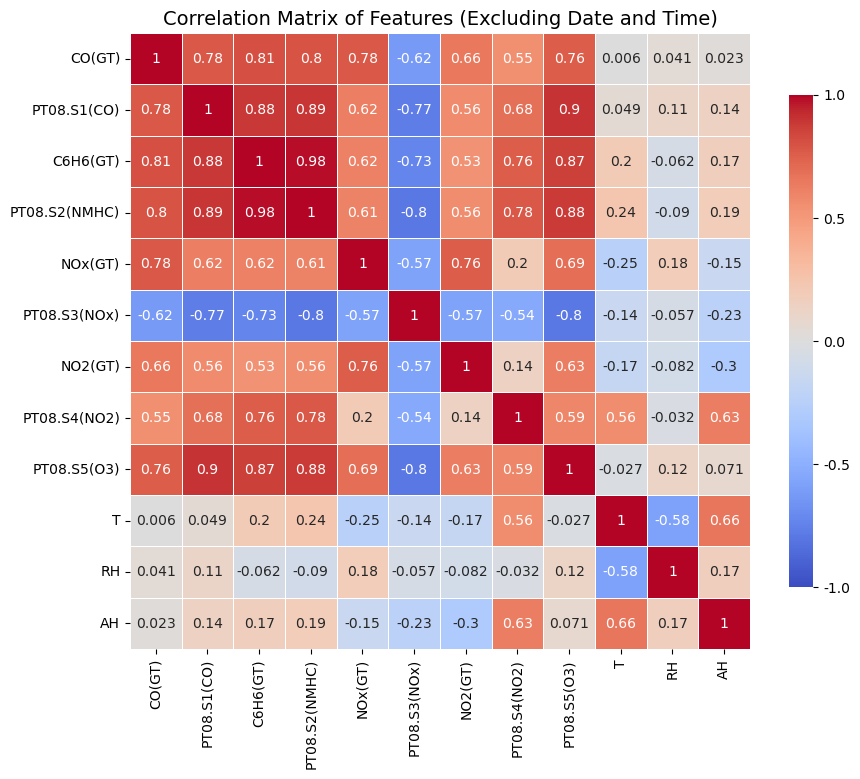

In [91]:
corr_matrix = filtered_df.corr() # calculate correlation
plt.figure(figsize=(10, 8)) # plot correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, 
            annot_kws={"size": 10},  # Adjust annotation size
            cbar_kws={"shrink": 0.8, "ticks": [-1, -0.5, 0, 0.5, 1], "format": "%.1f"})  # Adjust colorbar ticks

# Customize color bar font size
cbar = plt.gcf().axes[-1]  # Access the color bar
cbar.tick_params(labelsize=10)  # Set the font size for color bar ticks

plt.title('Correlation Matrix of Features (Excluding Date and Time)', fontsize=14)  # Adjust title size
plt.xticks(fontsize=10)  # Adjust x-axis label size
plt.yticks(fontsize=10)  # Adjust y-axis label size
plt.show()

### Addressing Collinearity - Variance Inflation Factor (VIF)

Collinearity is when two or more predictor variables are closely related to one another. The presence of collinearity can pose problems in the regression context since it can be difficult to separate out the individual effects of collinear variables on the response.

* The VIF is a more robust method to detect multicollinearity. It calculates how much the variance of a regression coefficient is inflated due to multicollinearity. 
* The smallest possible value for VIF is 1, indicating the complete absence of collinearity.
* A VIF value greater than 5-10 suggests high multicollinearity.

In [95]:
X = filtered_df.drop(columns=['PT08.S5(O3)']).select_dtypes(include=[float, int]) # ensure only numeric types are selected
X = sm.add_constant(X) # Add a constant column for the intercept
vif_data = pd.DataFrame() # Calculate VIF for each feature
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Feature         VIF
0           const  668.315736
1          CO(GT)    5.294566
2     PT08.S1(CO)    7.090206
3        C6H6(GT)   40.270907
4   PT08.S2(NMHC)   61.718325
5         NOx(GT)    5.582981
6    PT08.S3(NOx)    5.431243
7         NO2(GT)    3.602312
8    PT08.S4(NO2)   13.249769
9               T   14.114210
10             RH    8.130882
11             AH   10.456782


<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
        <li><b>Temperature</b> and <b>Humidity</b> have a low correlation with ozone. While these variables typically affect atmospheric conditions like the dispersion of pollutants or influencing chemical reactions, <b>they don't have a one-to-one linear relationship</b> with pollutant concentration levels and, therefore, don't directly contribute to gas production. For example, carbon monoxide and nitrogen oxides are often released by combustion processes (e.g., vehicles and industries).</li>
        <li><b>Non-linear models</b> may be required in order to uncover the indirect effects of temperature on ozone formation.</li>
        <li>VIF suggests a <b>strong multicollinearity (above 10)</b> for C<sub>6</sub>H<sub>6</sub>(GT), PT08.S2(NMHC), PT08.S4(NO<sub>2</sub>), T, and AH, indicating that these variables are highly correlated with other predictors in the dataset.</li>
        <li>CO(GT), PT08.S1(CO), NOx(GT), PT08.S3(NOx), and RH have a <b>moderate multicollinearity (between 5 and 10)</b>.</li>
        <li>The only variable with <b>low multicollinearity</b> is NO<sub>2</sub>(GT).</li>
        <li>Consideration to drop PT08.S2(NMHC), PT08.S4(NO<sub>2</sub>), CO(GT), PT08.S1(CO), PT08.S3(NOx), AH (Absolute Humidity) and RH (Relative Humidity) given their multicollinearity, to improve the model's stability.</li>
        <li><b>NOx(GT) and NO<sub>2</sub>(GT)</b> have a positive correlation with PT08.S5(O3) of 0.694823 and 0.630425	respectively.</li>
    </ul>
</div>

In [97]:
X = filtered_df.drop(columns=['PT08.S5(O3)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S3(NOx)', 'CO(GT)', 'PT08.S1(CO)', 'AH', 'RH']).select_dtypes(include=[float, int]) # ensure only numeric types are selected
X = sm.add_constant(X) # Add a constant column for the intercept
vif_data = pd.DataFrame() # Calculate VIF for each feature
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Feature        VIF
0     const  15.180808
1  C6H6(GT)   2.076899
2   NOx(GT)   3.208927
3   NO2(GT)   2.414883
4         T   1.350365


<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
    For investigating the impact of Temperature on Ozone (O<sub>3</sub>) formation with temporal lag, the following variables are selected:
        <li><b>DateTime:</b> Essential for capturing the temporal aspect, which helps in assessing the impact of temperature and other factors on ozone formation over time. Temporal analysis can also help explore delayed effects (lag) of temperature and pollutants on O<sub>3</sub> formation.</li>
        <li><b>Directly impact ozone formation:</b> Temperature (T) is crucial because it influences atmospheric reactions leading to ozone formation.</li>
        <li><b>Contribute to the chemical processes of O<sub>3</sub> formation:</b> Nitrogen oxides (NOx), NO<sub>2</sub>, and  C<sub>6</sub>H<sub>6</sub>(GT) are key precursors in ozone formation. These gases react in the presence of sunlight, especially under higher temperatures, to produce ozone.</li>
    </ul>
</div>

### Lag O<sub>3</sub>Features

Create lagged versions of O<sub>3</sub> (e.g., 1-day, 2-day lag) to capture delayed effects of temperature and pollutant formation.

In [101]:
# Create lagged O₃ variables
df['O3_lag1'] = df['PT08.S5(O3)'].shift(1)
df['O3_lag2'] = df['PT08.S5(O3)'].shift(2)
df['O3_lag3'] = df['PT08.S5(O3)'].shift(3)
df['O3_lag4'] = df['PT08.S5(O3)'].shift(4)
df['O3_lag5'] = df['PT08.S5(O3)'].shift(5)

### Clean DataFrame

In [103]:
df_clean = df.drop(columns=['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
      'RH', 'AH'])

In [104]:
df_clean.head()

,C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,DateTime,O3_lag1,O3_lag2,O3_lag3,O3_lag4,O3_lag5
0,11.9,166.0,113.0,1268.0,13.6,2004-03-10 18:00:00,NaN,NaN,NaN,NaN,NaN
1,9.4,103.0,92.0,972.0,13.3,2004-03-10 19:00:00,1268.0,NaN,NaN,NaN,NaN
2,9.0,131.0,114.0,1074.0,11.9,2004-03-10 20:00:00,972.0,1268.0,NaN,NaN,NaN
3,9.2,172.0,122.0,1203.0,11.0,2004-03-10 21:00:00,1074.0,972.0,1268.0,NaN,NaN
4,6.5,131.0,116.0,1110.0,11.2,2004-03-10 22:00:00,1203.0,1074.0,972.0,1268.0,NaN


In [105]:
# Drop missing values
df_clean = df_clean.dropna()

In [106]:
df_clean.columns

Index(['C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)', 'T', 'DateTime',
       'O3_lag1', 'O3_lag2', 'O3_lag3', 'O3_lag4', 'O3_lag5'],
      dtype='object')

### Boxplot Insights

This grid of boxplots provides insight into the pollutant and environmental features in the data, including their range, central tendency, and variability.

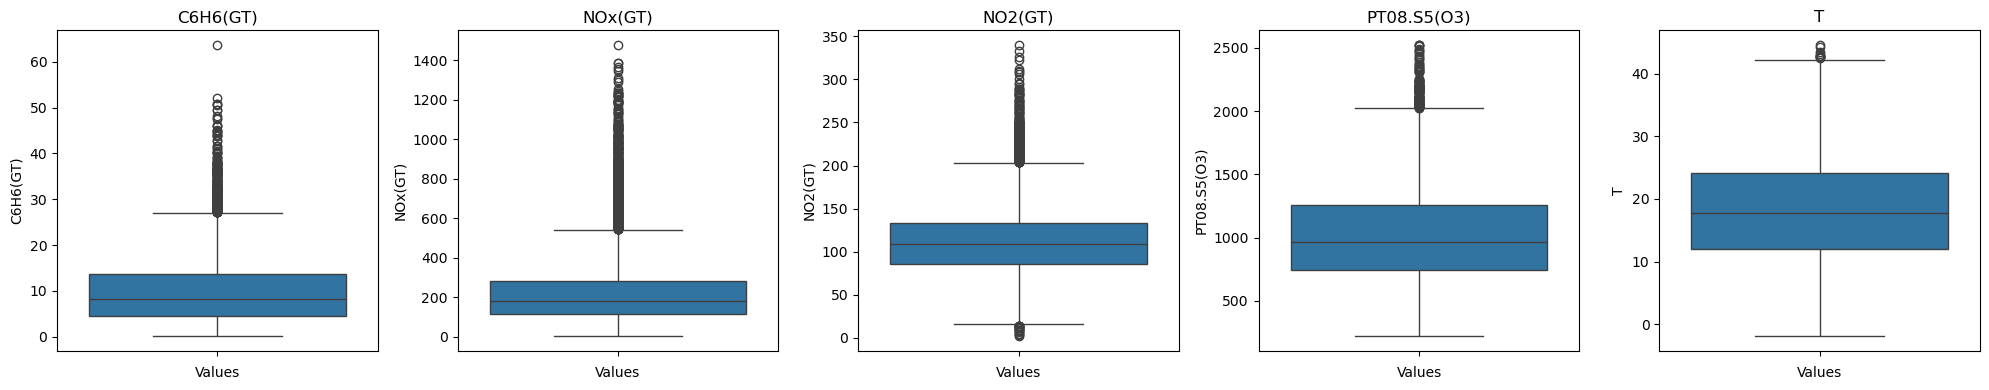

In [109]:
#Set up grid
bx_df = df_clean.drop(columns=['DateTime', 'O3_lag1', 'O3_lag2', 'O3_lag3', 'O3_lag4', 'O3_lag5'])
nbr_features = len(bx_df.columns)
nbr_cols = 5
nbr_rows = (nbr_features // nbr_cols) + (nbr_features % nbr_cols > 0)

# Adjust figure size based on number of rows
fig, axes = plt.subplots(nbr_rows, nbr_cols, figsize=(20, nbr_rows *4))
axes = axes.flatten()

# Loop over features to create boxplots
for i, column in enumerate(bx_df.columns):
    sns.boxplot(y=bx_df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
        
# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Show the plot

**Findings:** Some boxplots display outliers which should be investigated.

### Outliers

#### Z-score Method

In [113]:
# Select relevant columns from bx_df
columns_to_check = ['C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)', 'T']

# Function to calculate outliers using Z-score method
def calculate_outliers_zscore(df, column, threshold=3):
    # Calculate the Z-score for each value in the column
    z_scores = zscore(df[column])
    
    # Create a boolean mask for outliers
    outlier_mask = abs(z_scores) > threshold
    
    # Filter rows where the Z-score exceeds the threshold and assign Outlier_Type
    outliers = df[outlier_mask].copy()  # Create a copy to avoid SettingWithCopyWarning
    outliers['Outlier_Type'] = f'{column} outlier'
    
    return outliers

# Create an empty DataFrame to store all outliers
outlier_df = pd.DataFrame()

# Iterate over each column in bx_df and calculate outliers
for col in columns_to_check:
    outliers = calculate_outliers_zscore(bx_df, col)
    
    # Append to the final outlier DataFrame
    outlier_df = pd.concat([outlier_df, outliers], ignore_index=True)

# Reset index for better readability
outlier_df.reset_index(drop=True, inplace=True)

# Show final outliers dataframe
outlier_df.head(10)

,C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,Outlier_Type
0,32.6,340.0,170.0,1887.0,12.9,C6H6(GT) outlier
1,36.7,478.0,149.0,2184.0,14.8,C6H6(GT) outlier
2,32.1,314.0,162.0,1843.0,22.5,C6H6(GT) outlier
3,39.2,404.0,187.0,2122.0,20.4,C6H6(GT) outlier
4,36.4,377.0,127.0,1931.0,14.1,C6H6(GT) outlier
5,38.4,411.0,194.0,2306.0,23.1,C6H6(GT) outlier
6,35.1,347.0,182.0,2359.0,20.5,C6H6(GT) outlier
7,35.8,421.0,151.0,2051.0,14.3,C6H6(GT) outlier
8,33.7,302.0,129.0,1806.0,16.2,C6H6(GT) outlier
9,33.7,351.0,158.0,2086.0,17.4,C6H6(GT) outlier


In [114]:
print(bx_df[columns_to_check].describe())

          C6H6(GT)      NOx(GT)      NO2(GT)  PT08.S5(O3)            T
count  9352.000000  9352.000000  9352.000000  9352.000000  9352.000000
mean     10.009880   235.229470   112.373824  1020.506843    18.300834
std       7.313594   195.130029    43.959630   390.874684     8.659352
min       0.100000     2.000000     2.000000   221.000000    -1.900000
25%       4.600000   112.000000    86.000000   741.750000    12.000000
50%       8.200000   180.000000   109.000000   963.000000    17.800000
75%      13.600000   284.000000   133.000000  1255.250000    24.100000
max      63.700000  1479.000000   340.000000  2523.000000    44.600000


In [115]:
bx_df.columns

Index(['C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)', 'T'], dtype='object')

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
        Several of the variables in this analysis exhibited a <b>right-skewed distribution</b> with noticeable <b>outliers.</b>
        These outliers likely indicate significant pollution events, such as spikes in emissions from industrial activities or traffic. Although outliers can sometimes distort the analysis, they are not being dropped in this case, as they contain valuable information regarding extreme pollution levels. If these outliers were removed, critical insights about environmental or human activities causing these pollution surges might be lost. By retaining them, it is ensured that the full range of variability in air quality is reflected, particularly for high-impact events that may require attention for public health and regulatory actions.
    </ul>
</div>

### Lineplots Insights

Analyze features over time to identify trends, seasonal patterns, or correlations between different pollutants.

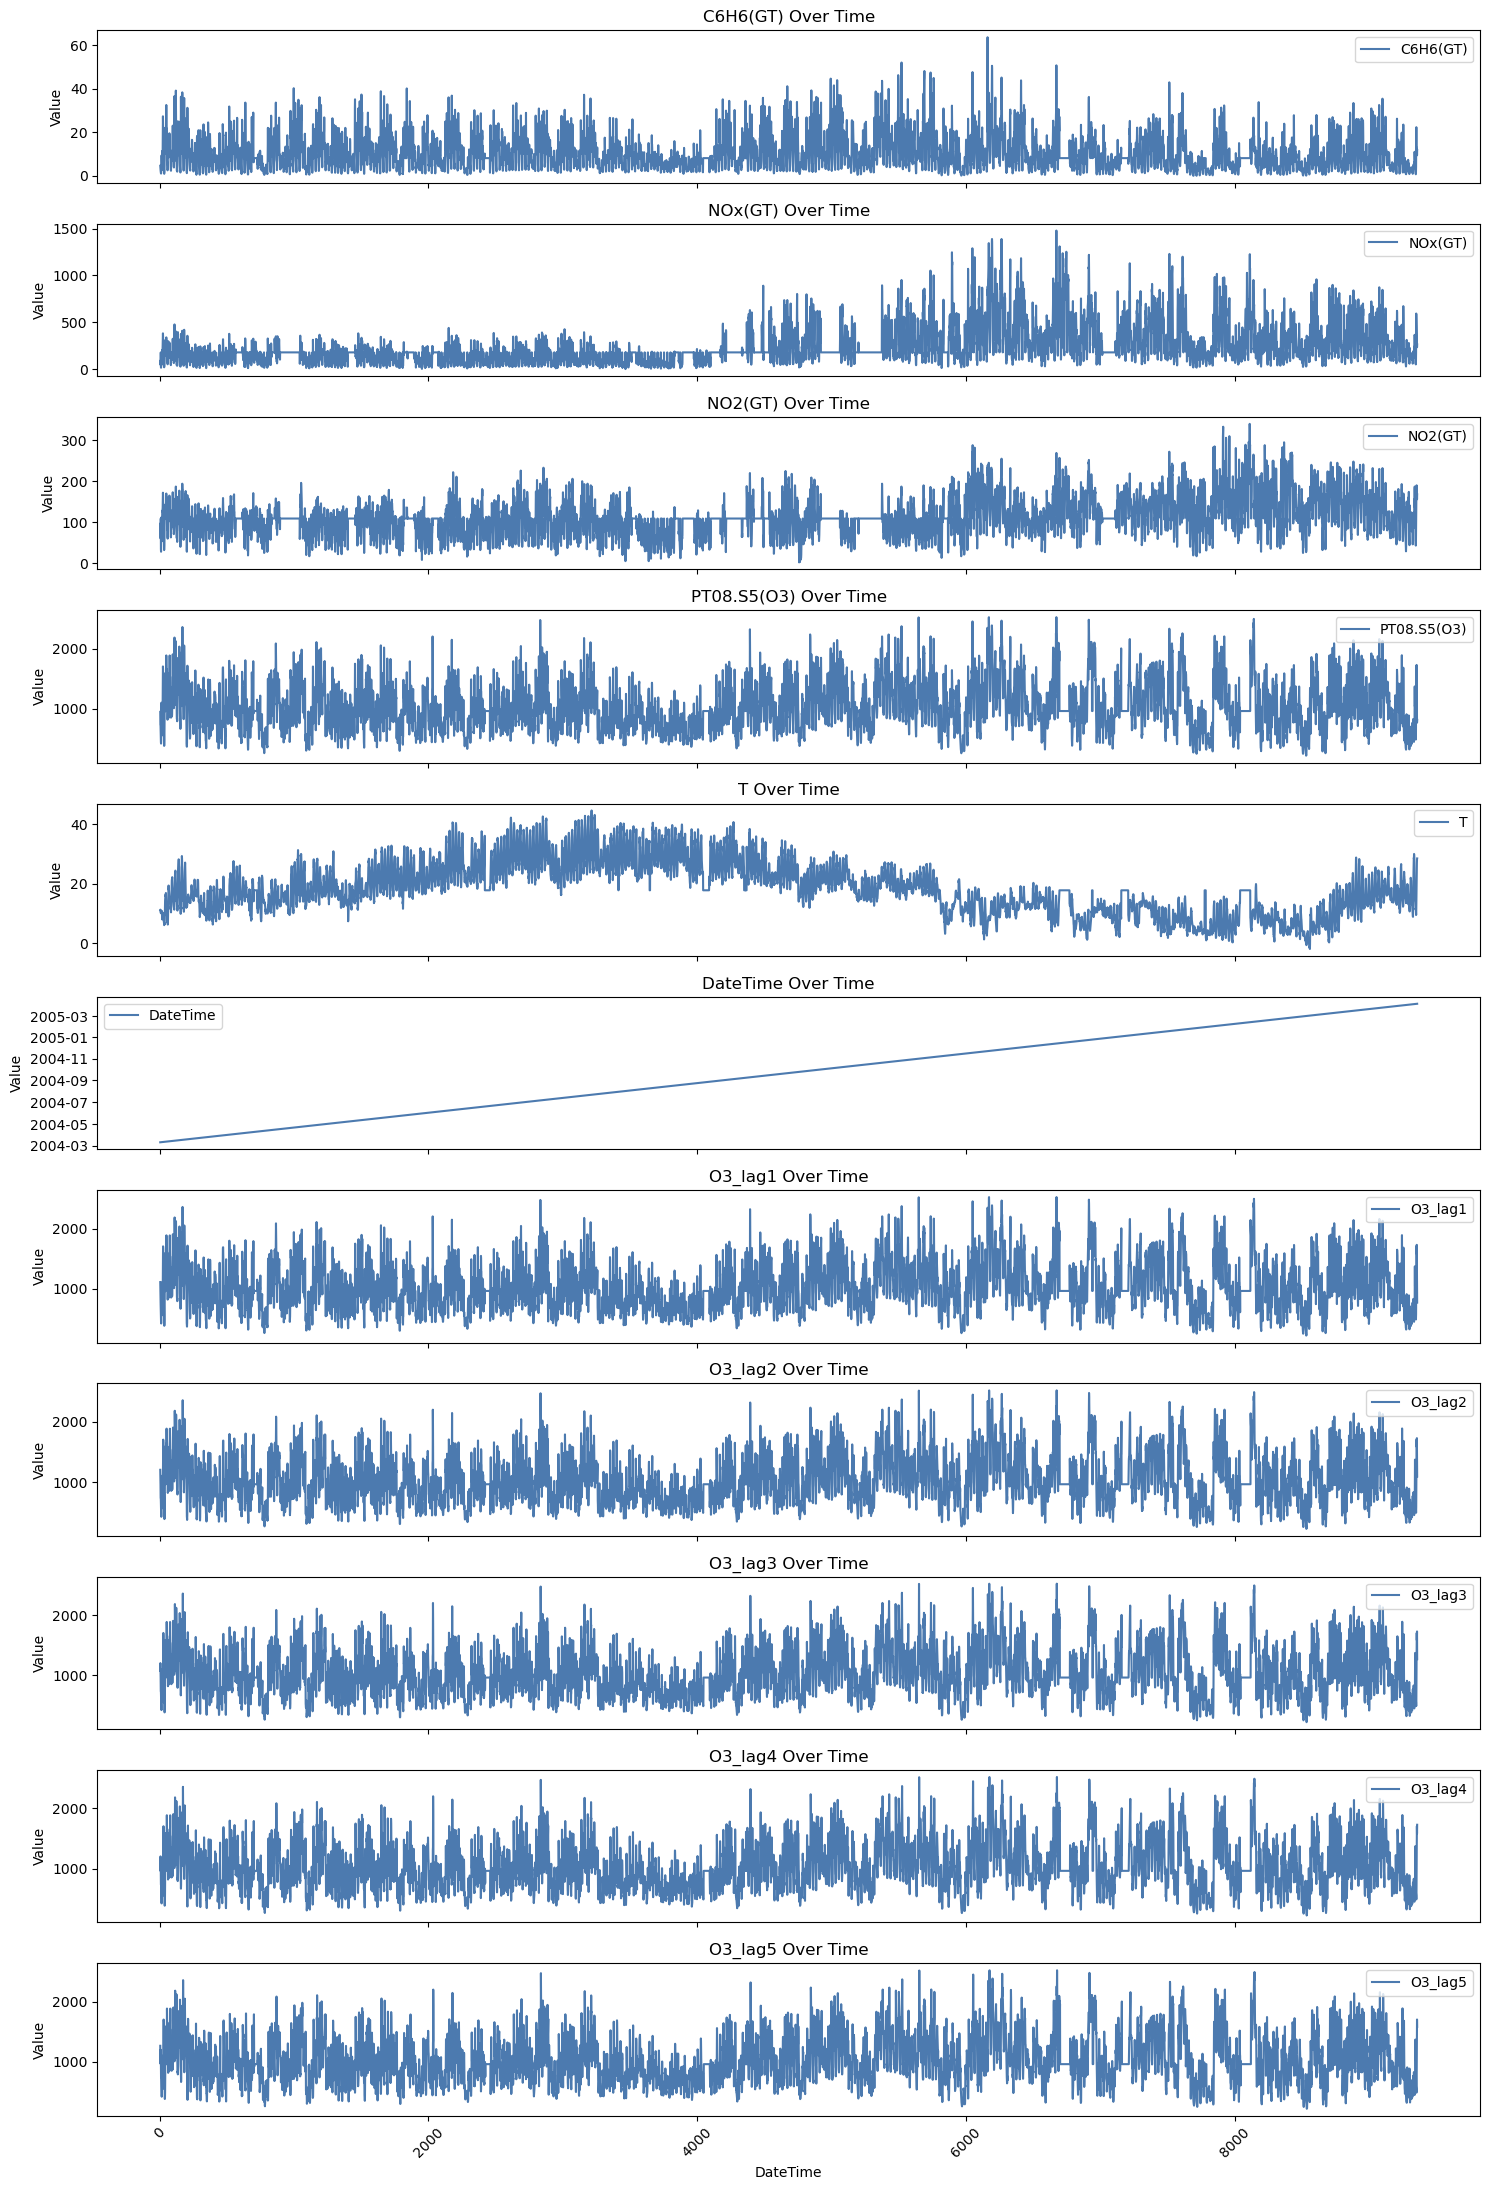

In [119]:
# Create a new figure with subplots
num_columns = len(df_clean.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(15, 2 * num_columns), sharex=True)  # Adjusted height

# Iterate over each column to create subplots
for ax, column in zip(axes, df_clean.columns):
    ax.plot(df_clean.index, df_clean[column], label=column, color='#4C7AAF')  # Set color to #4C7AAF
    ax.set_ylabel('Value')
    ax.set_title(f'{column} Over Time')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add a common xlabel for all subplots
plt.xlabel('DateTime')
plt.tight_layout()  # Adjust layout to fit all elements

# Show plot
plt.show()

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
        <li>C6H6(GT) Over Time: The concentration of benzene (C6H6) appears to fluctuate significantly over time, with no obvious long-term trend. There are short periods of increased levels followed by consistent dips, suggesting periodic emission sources or environmental factors influencing benzene levels.
</li>
        <li>NOx(GT) Over Time: The nitrogen oxides (NOx) show a more varied pattern, with a lower baseline initially and more frequent peaks toward the latter half of the time series. This could indicate increased emissions from traffic or industrial activity, with some larger spikes possibly representing specific pollution events.
</li>
        <li>NO2(GT) Over Time: Nitrogen dioxide (NO2) concentrations also show considerable variability, with spikes similar to NOx but on a smaller scale. The data suggests that NO2 may be influenced by similar sources as NOx, likely traffic-related emissions or other combustion activities.
</li>
        <li>PT08.S5(O3) Over Time: This represents the ozone (O3) sensor data. There is significant short-term fluctuation with some high peaks, but overall, it doesn’t show a clear trend over the entire period. These fluctuations could be linked to diurnal or seasonal cycles, where ozone levels increase during sunny periods due to photochemical reactions.
</li>
        <li>T (Temperature) Over Time: The temperature data shows a gradual trend of increasing values over time, possibly reflecting a seasonal pattern (e.g., from cooler to warmer months). There’s less variability compared to the pollutant data, but the relationship between temperature and ozone formation may be seen by comparing these graphs.</li>
    </ul>
</div>

### Distributions - Histograms

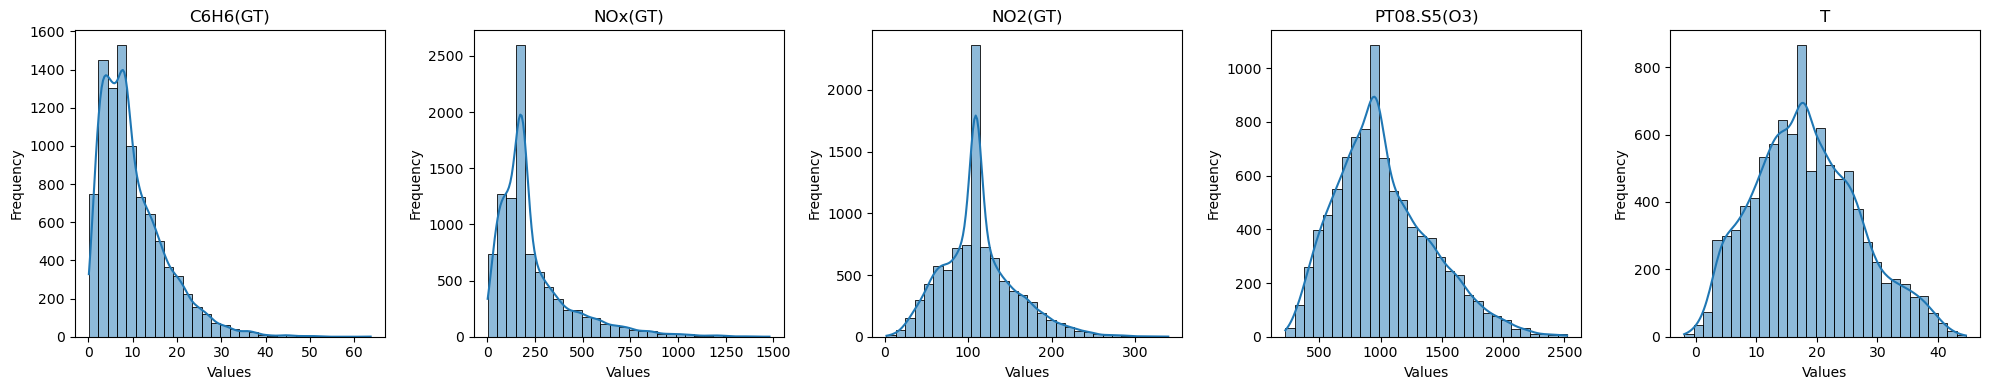

In [122]:
# Define the number of columns for the subplots
nbr_cols = 5  # Set to 5 for five histograms per row
num_columns = len(bx_df.columns)
nbr_rows = (num_columns // nbr_cols) + (num_columns % nbr_cols > 0)  # Calculate the required number of rows

# Create subplots
fig, axes = plt.subplots(nbr_rows, nbr_cols, figsize=(20, nbr_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate over each column in the DataFrame
for i, column in enumerate(bx_df.columns):
    sns.histplot(bx_df[column], ax=axes[i], bins=30, kde=True)  # Adding `kde=True` for kernel density estimate
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
        <li>Skewed Data: Most pollutant variables (C6H6, NOx, NO2) show skewness, indicating that pollution events with very high concentrations are less common but still present. These spikes could represent outlier events caused by factors such as industrial activities or rush-hour traffic.</li>
        <li>Ozone and Temperature: Both the ozone sensor data and temperature show more symmetrical distributions. This might suggest that ozone formation is fairly consistent in the dataset, and temperature variations (which are normally distributed) likely play a significant role in the ozone formation process.</li>
        <li>Insight into Pollution: The skewness and tails of the pollutant distributions point toward occasional extreme pollution events. These can be analyzed further to determine the causes and their temporal distribution.</li>
    </ul>
</div>

### Pairplot - Inspecting Relationships

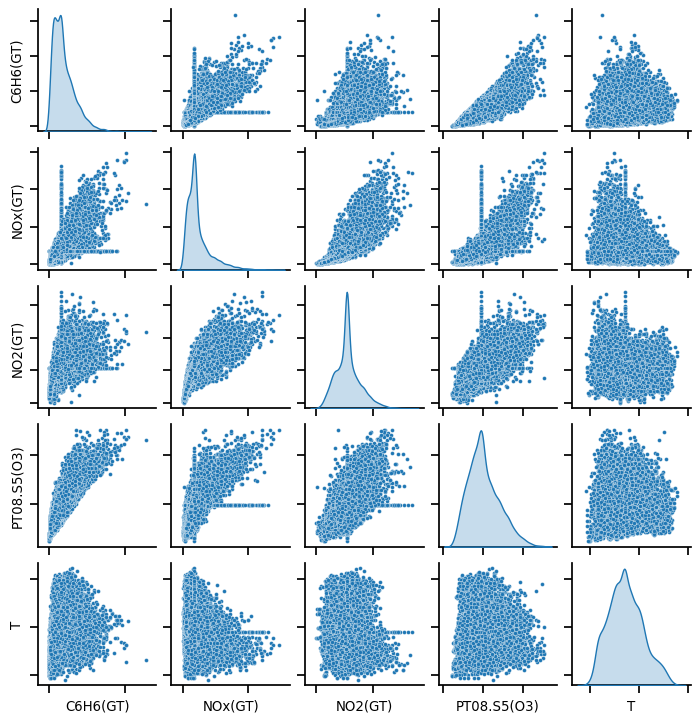

In [125]:
sns.set_context("notebook", font_scale=0.8)  # ajust font size
pairplot = sns.pairplot(bx_df, diag_kind='kde', height=1.5, plot_kws={'s': 8}) #set plot graph parameters
# Customize the axes
num_vars = len(bx_df.columns)
for i, ax in enumerate(pairplot.axes.flatten()):
    # Hide tick labels for all axes
    ax.tick_params(labelbottom=False, labelleft=False)
    # Show x-axis label for the last row
    if i // num_vars == num_vars - 1:  # Check if in the last row
        ax.xaxis.label.set_visible(True)
    # Show y-axis label for the first column
    if i % num_vars == 0:  # Check if in the first column
        ax.yaxis.label.set_visible(True)
# Show the plot
plt.show()

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Key Findings:</h3>
    <ul>
        An upward trend is visible for the pollutants related to nitrogen oxides (NOx and NO2) and ozone, while temperature does not have a strong or consistent relationship with the pollutant levels.
    </ul>
</div>

<h1 style="color:#4C7AAF;">Models</h1>

<h2 style="color:#4C7AAF;">Linear Regression and the Delayed Effect of Temperature on Ozone Formation</h2>

* This **Linear Regression Model** explores the **impact of temperature on ozone (O<sub>3</sub>) formation**, taking into account potential delays in this relationship through the incorporation of **lagged ozone concentrations**. 
* Understanding the dynamics of ozone formation is crucial, particularly in the context of air quality and public health, as **elevated ozone levels** can lead to **respiratory issues** and **other health problems**. 
* This model quantifies the influence of temperature along with other pollutant concentrations, such as benzene (C<sub>6</sub>H<sub>6</sub>), nitrogen dioxide (NOO<sub>2</sub>), and nitrogen oxides (NOx), on current ozone levels. 
* By comparing models with and without lagged variables, we aim to assess the significance of temporal effects in ozone formation, ultimately providing insights that could inform environmental policy and strategies for air quality management.


<h3 style="color:#4C7AAF;">Linear Regression Without Lag Features</h3>

In [131]:
# Select features excluding lagged ozone concentrations
features_no_lag = ['T', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)']
target = 'PT08.S5(O3)'

X_no_lag = df_clean[features_no_lag]
y_no_lag = df_clean[target]  # Target is current ozone concentration

# Train-Test Split
X_train_no_lag, X_test_no_lag, y_train_no_lag, y_test_no_lag = train_test_split(X_no_lag, y_no_lag, test_size=0.2, random_state=42)

# Initialize and train the model
model_no_lag = LinearRegression()
model_no_lag.fit(X_train_no_lag, y_train_no_lag)

# Make predictions
y_pred_no_lag = model_no_lag.predict(X_test_no_lag)

# Evaluate the model
mae_no_lag = mean_absolute_error(y_test_no_lag, y_pred_no_lag)
r2_no_lag = r2_score(y_test_no_lag, y_pred_no_lag)

print(f"Mean Absolute Error (No Lag): {mae_no_lag}")
print(f"R-squared (No Lag): {r2_no_lag}")

Mean Absolute Error (No Lag): 134.25860546866693
R-squared (No Lag): 0.8112749373567055


In [132]:
# Perform 5-fold cross-validation on the Linear Regression model without Lag Features
cv_scores = cross_val_score(model_no_lag, X_train_no_lag, y_train_no_lag, cv=5, scoring='neg_mean_absolute_error')

# Average MAE across folds
cv_mae = -cv_scores.mean()
print(f"Cross-Validated MAE (Linear Regression): {cv_mae}")

Cross-Validated MAE (Linear Regression): 130.44234498810022


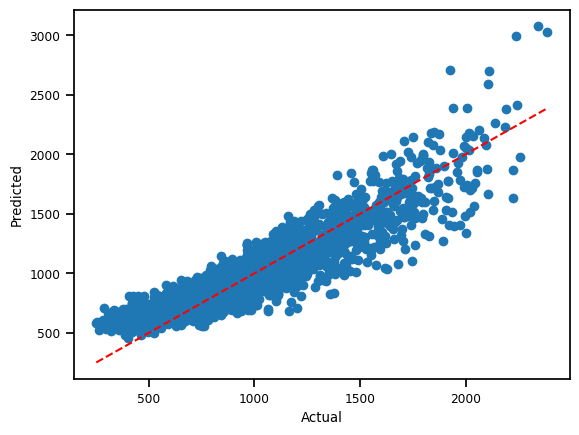

In [133]:
# Visualize linear regression model
plt.scatter(y_test_no_lag, y_pred_no_lag)
plt.plot([y_test_no_lag.min(), y_test_no_lag.max()], [y_test_no_lag.min(), y_test_no_lag.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<h3 style="color:#4C7AAF;">Linear Regression With Lag Features</h3>

In [135]:
# Select features
features = ['T', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)', 'O3_lag1', 'O3_lag2', 'O3_lag3', 'O3_lag4', 'O3_lag5']
target = 'PT08.S5(O3)'
X = df_clean[features]
y = df_clean[target]  # Target is current ozone concentration

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 85.17511785365097
R-squared: 0.9198283023301498


#### Cross-Validation

In [137]:
# Perform 5-fold cross-validation on the Linear Regression model with Lag Features
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Average MAE across folds
cv_mae = -cv_scores.mean()
print(f"Cross-Validated MAE (Linear Regression): {cv_mae}")

Cross-Validated MAE (Linear Regression): 82.21641087191719


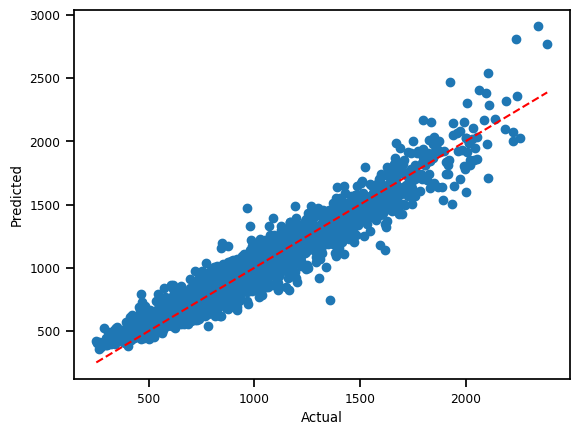

In [138]:
# Visualize linear regression model
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Results, Analysis & Conclusion:</h3>
    <ul>
        <li>Linear Regression with 5 Lag Features:</li>
        <ul>
                <li><b>Mean Absolute Error (with Lag)</b>: 85.17511785365097</li>
                <li><b>R-squared (with Lag)</b>: 0.9198283023301498</li>
        </ul>
        <li>Linear Regression without Lag Features</li>
        <ul>
            <li><b>Mean Absolute Error (No Lag)</b>: 134.25860546866693</li>
            <li><b>R-squared (No Lag)</b>: 0.8112749373567055</li>
        </ul>
        <li><b>Comparison</b>: The model with lag significantly outperforms the model without lag by about 49.08 units in <b>MAE</b>, indicating that including lagged features leads to <b>more accurate predictions</b>.</li>
        <li><b>Comparison</b>: The difference of 0.11 in <b>R<sup>2</sup></b> suggests that the <b>model with lag provides a better fit and captures the underlying relationships in the data more effectively</b>.</li>
        <li><b>Conclusion:</b></li>
        <ul>
            <li><b>Including Lagged Features:</b> The results show that high temperatures during the day have a delayed effect on ozone formation, as reflected in the lower error and higher explanatory power of the model that includes lagged variables.</li>
            <li><b>Impact of Temperature:</b> This suggests that temperature does play a crucial role in ozone formation, but its impact may not be immediate; hence, lagged variables help capture this relationship better.</li>
        </ul>
    </ul>
</div>

<h3 style="color:#4C7AAF;">Linear Regression with Optimal Number of Lag Features</h3>

* Identify the Minimum MAE: Look for the number of lag features that results in the lowest MAE.
* Examine R² Values: Ensure that the R² values remain reasonably high, indicating that the model is adequately capturing the variance in the target variable.
* Balance Complexity and Performance: Ideally, you want to select the configuration that achieves a good performance (low MAE and high R²) while using the fewest features possible.

In [142]:
# Define the base features
base_features = ['T', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)']
target = 'PT08.S5(O3)'

# Prepare lists to store results
results = []

# Iterate from 1 to 5 lag features
for lag in range(1, 6):
    # Create lagged feature names
    lagged_features = [f'O3_lag{i}' for i in range(1, lag + 1)]
    
    # Combine base features and lagged features
    features = base_features + lagged_features
    
    # Prepare the input (X) and target (y) data
    X = df_clean[features]
    y = df_clean[target]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({'Lag Features': lag, 'MAE': f"{mae:.3f}", 'R²': f"{r2:.3f}"})

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

   Lag Features     MAE     R²
0             1  86.148  0.918
1             2  85.791  0.919
2             3  85.339  0.920
3             4  85.262  0.920
4             5  85.175  0.920


#### Cross-Validation

In [144]:
# Perform 5-fold cross-validation on the Linear Regression model with optimal Lag features
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Average MAE across folds
cv_mae = -cv_scores.mean()
print(f"Cross-Validated MAE (Linear Regression): {cv_mae}")

Cross-Validated MAE (Linear Regression): 82.21641087191719


<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Results, Analysis & Conclusion:</h3>
    <ul>
        <li>The MAE decreases as the number of lag features increases, indicating that the model's predictions become more accurate by including more lagged variables. <b>The lowest MAE is achieved with five lag features (85.175), but the differences among the last three models (with 3, 4, and 5 lag features) are minimal.</b></li>
        <li>The R<sup>2</sup> value also shows an upward trend, indicating that the model explains more variance in the target variable as more lag features are included. <b>The R<sup>2</sup> stabilizes at around 0.920 for the last three models, suggesting that adding more lag features beyond three does not significantly enhance the model's explanatory power.</b></li> <br>
        <li><b>Conclusion:</b> 
            <ul>
                <li><b>Based on the results, using three lag features provides a good balance between model complexity and performance. It achieves an MAE of 85.339 and an R² of 0.920.</b></li>
                <li><b>Although adding more lag features results in slightly better MAE, the improvements in performance are minimal. Therefore, reducing the number of features from 5 to 3 can simplify the model without sacrificing much accuracy.</b></li>
            </ul>
    </ul>
</div>

<h2 style="color:#4C7AAF;">Random Forest and the Delayed Effect of Temperature on Ozone Formation</h2>

* Compare Models With and Without Lagged Variables: Training two separate Random Forest models, one including lagged variables and one without them, will show weather adding lagged variables reduces the error and increases the R-squared score.

* Evaluate Feature Importance: If the lagged variables (e.g., O3_lag1, O3_lag2, etc.) extracted during feature importance for each variable show high importance, it suggests that delayed effects, such as temperature's impact over time, play a significant role in ozone formation.

<h3 style="color:#4C7AAF;">Random Forest and the Delayed Effect of Temperature on Ozone Formation</h3>

In [149]:
features = ['T', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)', 'O3_lag1', 'O3_lag2', 'O3_lag3', 'O3_lag4', 'O3_lag5']
target = 'PT08.S5(O3)'

# Split the data into features and target
X = df_clean[features]
y = df_clean[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Random Forest): {mae_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

Mean Absolute Error (Random Forest): 73.27272047033672
R-squared (Random Forest): 0.9382707602233779


#### Cross-Validation

* Cross-validation is a technique used to assess the performance of a machine learning model by splitting the data into multiple subsets, training the model on some of those subsets, and validating it on the others. In this case, 5-fold cross-validation is being used, which means the training data (X_train, y_train) is divided into 5 equal parts or "folds."
* The model (rf_model, which is a Random Forest Regressor) is trained on 4 of these folds and validated on the remaining fold. This process is repeated 5 times, each time using a different fold for validation and the remaining 4 for training.

In [152]:
# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Average MAE across folds
cv_mae = -cv_scores.mean()
print(f"Cross-Validated MAE: {cv_mae}")

Cross-Validated MAE: 71.90438311650038


<h3 style="color:#4C7AAF;">Random Forest With Feature Importance</h3>

In [154]:
# Split the data into features and target
X = df_clean[features]
y = df_clean[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3 style="color:#4C7AAF;">Feature Importance / Ranking (Top 5 + Temp)</h3>

In [156]:
# Initialize the ExtraTreesRegressor for feature selection
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Fit the model to get feature importances
et_model.fit(X_train, y_train)

# Get feature importances and create a DataFrame
importances = et_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)

# Ensure 'T' is always included and select the top N features including 'T'
# Get all features except 'T' for selection
features_without_temp = importance_df[importance_df['Feature'] != 'T']
# Combine 'T' with top 5 features based on importance
top_n_features = ['T'] + features_without_temp['Feature'].head(5).tolist()  # Keep 'T' and top 5 others

Feature Importances:
    Feature  Importance
4   O3_lag1    0.450436
1  C6H6(GT)    0.313190
5   O3_lag2    0.077112
3   NOx(GT)    0.076894
2   NO2(GT)    0.026461
0         T    0.020797
6   O3_lag3    0.017552
7   O3_lag4    0.008909
8   O3_lag5    0.008649


In [157]:
# Recreate training and test sets with selected features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (Random Forest with Selected Features): {mae_rf:.4f}")
print(f"R-squared (Random Forest with Selected Features): {r2_rf:.4f}")


Mean Absolute Error (Random Forest with Selected Features): 74.7508
R-squared (Random Forest with Selected Features): 0.9356


#### Cross-Validation

In [159]:
# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5, scoring='neg_mean_absolute_error')

# Average MAE across folds
cv_mae = -cv_scores.mean()
print(f"Cross-Validated MAE: {cv_mae}")

Cross-Validated MAE: 73.23002178599623


<h3 style="color:#4C7AAF;">Feature Importance / Ranking (Top 5)</h3>

In [161]:
features = ['C6H6(GT)', 'NO2(GT)', 'NOx(GT)', 'T', 'O3_lag1', 'O3_lag2', 'O3_lag3', 'O3_lag4', 'O3_lag5']
target = 'PT08.S5(O3)'

# Split the data into features and target
X = df_clean[features]
y = df_clean[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ExtraTreesRegressor for feature selection
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Fit the model to get feature importances
et_model.fit(X_train, y_train)

# Get feature importances and create a DataFrame
importances = et_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)

# Select the top 5 most important features (excluding temperature)
top_n_features = importance_df['Feature'].head(5).tolist()

# Recreate training and test sets with selected features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Display results
print(f"\nMean Absolute Error (Random Forest with Top 5 Features): {mae_rf:.3f}")
print(f"R-squared (Random Forest with Top 5 Features): {r2_rf:.3f}")

Feature Importances:
    Feature  Importance
4   O3_lag1    0.451932
0  C6H6(GT)    0.304536
2   NOx(GT)    0.082977
5   O3_lag2    0.081065
1   NO2(GT)    0.030730
3         T    0.019995
6   O3_lag3    0.011627
8   O3_lag5    0.008846
7   O3_lag4    0.008293

Mean Absolute Error (Random Forest with Top 5 Features): 79.749
R-squared (Random Forest with Top 5 Features): 0.926


**Observation:** Selecting only the top 5 features which would exclude Temperature, increases MAE and reduces model performance. Therefore we will focus on model with top 6 feature importance ranking to ensure temperature is in the features selected.

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Results, Analysis & Conclusion:</h3>
    <ul>
        <li>The <b>Random Forest</b> model achieved <b>strong performance in predicting ozone levels</b> with a <b>Mean Absolute Error (MAE) of 73.27</b> and an <b>R-squared of 0.938</b>, indicating that <b>93.8% of the variance in the target variable (ozone) was explained by the model</b>. This result suggests that the model was highly effective at capturing the underlying relationships in the dataset. However, upon examining feature importance, it was found that <b>temperature (T)</b>—despite being the main focus of the analysis—had a much lower contribution to the model’s predictions, with an importance score of only 0.021. This suggests that temperature played a minor role in influencing ozone levels compared to the features C6H6, NO2, and NOx. However, <b>the importance of high temperatures is reflected in the delay of the ozone formation by one day when <b>O3_lag1</b> was rated the most important feature in the model (0.450436). </li> 
        <li>The secondary model was built using the most important features plus Temperature from the feature importance analysis. This model had a <b>slightly higher MAE of 74.75</b> and a <b>marginally lower R-squared of 0.936</b>. Although the <b>feature selection reduced model complexity, the performance was only slightly affected</b>, demonstrating that the most important features (particularly O3_lag1 and C6H6(GT)) captured most of the variance in ozone levels and confirmed the delayed effects of temperature. </li>
            <li>In all cases, <b>Cross-validation</b> showed that <b>the model generalized well to unseen data</b> by providing an improved MAE score.</li>
            <li>Temperature, despite being less important, does still provide some value to the model’s predictions, though not as much as initially hypothesized.</li>
            </ul>
</div>

<h1 style="color:#4C7AAF;">Discussion & Conclusion</h1>

<h3 style="color:#4C7AAF;">Results</h3>

In [166]:
results = {
    "Model": [
        "Linear Regression Without Lag Features",
        "Linear Regression with Lag Features",
        "Random Forest Without Feature Importance",
        "Random Forest With Feature Importance (Top 6)"
    ],
    "R-squared": [0.811, 0.920, 0.938, 0.936],
    "MAE": [134.259, 85.175, 73.273, 74.751],
    "Cross-Validation MAE": [130.442, 82.216, 71.904, 73.230]
}

results_df = pd.DataFrame(results)
results_df

,Model,R-squared,MAE,Cross-Validation MAE
0,Linear Regression Without Lag Features,0.811,134.259,130.442
1,Linear Regression with Lag Features,0.920,85.175,82.216
2,Random Forest Without Feature Importance,0.938,73.273,71.904
3,Random Forest With Feature Importance (Top 6),0.936,74.751,73.230


<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Learnings:</h3>
    <ul>
        <li>When <b>feature importance</b> was analyzed, the top contributors to the model’s predictions were <b>O3_lag1 and C6H6(GT)</b>, contributing 45.0% and 31.3% to the overall feature importance, respectively. This indicates that the most recent past ozone level (O3_lag1, which represents the delayed effect of temperature on ozone levels) and the benzene concentration (C6H6(GT)) are the primary drivers of the model’s predictions. Other features, such as NOx(GT), NO2(GT), and further lagged ozone values, had comparatively lower importance, contributing minimally to the overall model accuracy.</li>
        <li>The fact that <b>O3_lag1</b> was the top feature importance confirms the impact of temperature on ozone formation with a delay of 1 day. The variables O3_lag3, O3_lag4, and O3_lag5 had insignificant contributions of 0.017552, 0.008909, and 0.008649, respectively. It suggests that adding more lag features beyond two days does not significantly enhance the model's explanatory power. Moreover, <b>the delayed effects of temperature</b> are confirmed  by O3_lag1 and O3_lag2 primarily.</li>
        <li>A secondary model was built using only the most important features plus Temperature from the feature importance analysis. This model had a <b>slightly higher MAE of 74.75</b> and a <b>marginally lower R-squared of 0.936</b>. Although the <b>feature selection reduced model complexity, the performance was only slightly affected</b>, demonstrating that the most important features (particularly O3_lag1 and C6H6(GT)) captured most of the variance in ozone levels. This small drop in performance underscores that temperature, despite being less important, does still provide some value to the model’s predictions, though not as much as initially hypothesized.</li>
        <li>The <b>Random Forest model</b> had a <b>lower MAE (73.273)</b> than <b>the best-performing linear regression model (85.175)</b>. This indicates that Random Forest is more accurate in predicting ozone formation. The <b>R-squared</b> value for <b>Random Forest (0.938) is higher</b> than for <b>the best Linear Regression model (0.920)</b>, showing that <b>Random Forest explains more variance in ozone concentration</b>.</li>
        <li> Adding more lag features improved Linear Regression's performance slightly, but even with five lag features, it does not reach the accuracy of the Random Forest model.</li>
         <li>The improvement in R² and reduction in MAE with increasing lag features highlights the importance of considering past ozone levels, but Random Forest still captures more complex relationships in the data.</li>
        <li>Random Forest provides a better fit and more accurate predictions than Linear Regression, even when lagged variables are included in the latter. This suggests that the non-linear nature of Random Forest allows it to capture more intricate patterns in the data, such as the delayed effect of temperature on ozone formation.</li>
            </ul>
</div>

<div style="border: 2px solid #4C7AAF; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <h3 style="color: #4C7AAF;">Takeaways:</h3>
    <ul>
        <li>The Random Forest model outperformed the Linear Regression model. Random Forest’s non-linear modeling capacity was key to accurately predicting ozone levels, outperforming linear models, especially when dealing with complex environmental data like temperature, pollutants, and lagged ozone values. Its MAE and R-squared values validated its effectiveness.</li>
        <li>Lagged variables were crucial for improving the performance of both models, but Random Forest was more capable of leveraging these features to capture delayed effects, such as temperature's impact on ozone formation. The Linear Regression model, while improved by lagged features, did not reach the performance levels of Random Forest.</li>
        <li>Feature importance analysis showed that O3_lag1 and C6H6(GT) were the most influential factors in predicting ozone levels. This suggests that ozone formation is strongly influenced by past ozone concentrations, reinforcing the idea of a delayed response in the system. However, despite the initial hypothesis that temperature would play a significant role in ozone prediction, its lower feature importance indicates that temperature’s delayed effect on ozone formation is less direct and may act in combination with other atmospheric factors like pollutants rather than being a primary driver on its own.</li>
        <li>In summary, the Random Forest model performed very well, and the reduction to the most important features slightly increased error but maintained a high level of explanatory power. In conclusion, while temperature was expected to have a significant impact, the data revealed that its role in predicting ozone levels was relatively minimal compared to other atmospheric and pollution-related variables. This finding suggests that temperature may influence ozone indirectly or in combination with other factors, but on its own, it does not substantially drive the model's predictions.</li>
            </ul>
</div>

<h1 style="color:#4C7AAF;">Ways to Improve</h1>

**A Temporal Deep Dive:** 
Leveraging Date, Time, and Weekday features can provide deeper insights into the temporal patterns of pollution levels, allowing the model to capture daily, hourly, and weekly trends. This can help identify recurring patterns in pollution spikes, such as rush hour traffic, industrial activities, or weather-related effects, enhancing the prediction accuracy and providing actionable insights for pollution control and mitigation strategies.
<br> <br>
**Additional Data Sources:**
To further improve the model’s accuracy, additional environmental factors such as humidity, wind speed and atmospheric pressure could be integrated into the analysis. These variables influence the dispersion and concentration of pollutants like ozone, offering a more complete picture of the factors driving pollution. Including these data sources can refine predictions and support more targeted air quality management initiatives, such as understanding how these factors amplify or mitigate the impact of temperature on ozone formation.
<br> <br>
**Compare Models With and Without Outliers:**
A critical step in improving model reliability is addressing outliers in the data. Evaluating their impact can determine whether they signify important events (such as extreme pollution spikes) or potential noise that should be removed. Training an anomaly detection model could help analyze these events and reveal how outliers affect air pollution predictions. Understanding the role of outliers will ensure that the model accurately reflects both typical and extreme pollution levels.

**Exploring Other Machine Learning Models:**
In addition to Linear Regression and Random Forest, other machine learning models could be explored to capture non-linear relationships in the data. Techniques such as Support Vector Machines (SVM), Neural Networks, Gradient Boosting, or Long Short-Term Memory (LSTM) networks could offer better performance, especially in time-series analysis. These models can capture complex interactions and delayed effects, such as how temperature fluctuations lead to ozone formation. Experimenting with advanced algorithms will reveal the most effective approach for robust and accurate pollution forecasting, potentially yielding more precise predictions than simpler models.

<h1 style="color:#4C7AAF;">Reference</h1>

<div style="margin-left: 30px; text-indent: -20px;">
De Vito, S. (2008). Air Quality [Dataset]. UCI Machine Learning Repository. <a href="https://doi.org/10.24432/C59K5F">https://doi.org/10.24432/C59K5F</a>.
</div> <br>
<div style="margin-left: 30px; text-indent: -20px;">
De Vito, S., Piga, M., Martinotto, L., & Di Francia, G. (2009). CO, NO2 and NOx urban pollution monitoring with on-field calibrated electronic nose by automatic bayesian regularization. Sensors and Actuators B: Chemical, 143(1), 182-191.
</div> <br>
<div style="margin-left: 30px; text-indent: -20px;">
Kekulanadara, K. M. O. V. K., Kumara, B. T. G. S., & Kuhaneswaran, B. (2021). Machine Learning Approach for Predicting air quality index. 2021 International Conference on Decision Aid Sciences and Application (DASA). <a href="https://doi.org/10.1109/dasa53625.2021.9682221">https://doi.org/10.1109/dasa53625.2021.9682221</a>.
</div> <br>

